<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

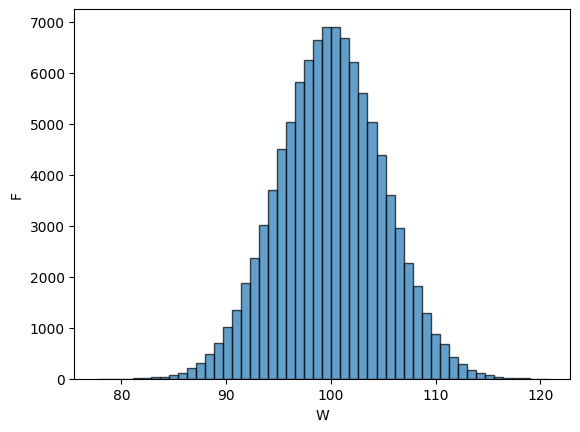

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def measure(weight):
    return weight + np.random.normal(0, 5, 1000)

weight = 100
tests = [measure(weight) for _ in range(100)]
flat_tests = [item for sublist in tests for item in sublist]

plt.hist(flat_tests, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('W')
plt.ylabel('F')
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [10]:
average = np.mean(tests[0])
rounded_average = round(average, 2)

print(f"The average is: {rounded_average}")

The average is: 100.22


3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

Yes, we use its log instead, for comfortable mathematical calculating and it's ok! Since the Likelihood function and its log are both ascending, the maximum point of these two functions will coincide. exactly. 

b) do the grid approximation and complete the cell below

In [38]:
weight_grid = np.linspace(0, 100)
log_likelihoods = norm.logpdf(np.array(tests[0])[:, np.newaxis], loc=weight_grid, scale=10).sum(axis=0)

max_log_likelihood = np.max(log_likelihoods)
mle_weight = weight_grid[np.argmax(log_likelihoods)]

print("Maximum Likelihood Estimate (MLE): ", mle_weight)

Maximum Likelihood Estimate (MLE):  100.0


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [40]:
import numpy as np
from scipy.stats import norm, invgamma

# The barrel of apples
# The average apples is between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 5

# NOTE: Try changing the number of measurements taken
N_MEASUREMENTS = 10

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)

def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)

def get_log_likelihood_grid(measurements):
    log_likelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurements).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_likelihood)

def get_mle(measurements):
    log_likelihood_grid = get_log_likelihood_grid(measurements)
    max_likelihood_index = np.unravel_index(np.argmax(log_likelihood_grid), log_likelihood_grid.shape)
    return WEIGHT_GUESSES[max_likelihood_index[1]]

def get_map(measurements):
    log_likelihood_grid = get_log_likelihood_grid(measurements)
    log_posterior_grid = log_likelihood_grid + LOG_PRIOR_GRID
    max_posterior_index = np.unravel_index(np.argmax(log_posterior_grid), log_posterior_grid.shape)
    return WEIGHT_GUESSES[max_posterior_index[1]]

# Pick an apple at random
apple = np.random.choice(BARREL)

# Weigh the apple
measurements = np.asarray([read_scale(apple) for _ in range(N_MEASUREMENTS)])

print(f"Average measurement: {measurements.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurements):.3f} g")
print(f"Maximum A Posteriori estimate: {get_map(measurements):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 83.143 g
Maximum Likelihood estimate: 83.414 g
Maximum A Posteriori estimate: 51.253 g
The true weight of the apple was: 83.478 g


<h3><i><i> Questions</h3>

1. How sensitive is the MAP measurement to the choice of prior?

The prior distribution directly affects the calculation of the MAP estimate, and its variance plays a crucial role in the outcome.

When the variance of the prior is low, it means that we have high confidence in our prior information, and it will have a more substantial impact on the result. This is because a low variance prior distribution has a narrow range of possible values, leading to a more constrained estimate. On the other hand, a high variance prior would have a broader range of possible values, leading to a less constrained estimate.

For instance, in the example provided, the Maximum Likelihood Estimate (MLE) is approximately 80, while the MAP estimate is around 50. The difference between the two estimates is significant, and it is primarily due to the effect of the prior in the MAP calculation. The prior distribution in this case has a low variance, indicating that we have high confidence in our prior information. Therefore, the MAP estimate is more heavily influenced by the prior information and ends up being lower than the MLE.

2. How sensitive is the MLE and MAP answer to the grid size?
    
The size of the grid can greatly affect the accuracy of our estimates. Both small and large grid sizes can be sensitive, but more points in the grid can help us capture subtle variations in the likelihood and posterior distributions, leading to a more precise estimate. Conversely, a coarser grid may miss the true parameters and result in less accurate estimation. This difference becomes much more noticeable when the grid is made more coarse, as shown above.